# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Chegini  

*SID:* 810801064

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [3]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [4]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

In [5]:
print(arrival_times)

[0.08751005638892237, 0.2984799868543623, 0.4699438245825561, 0.7447411492501607, 1.2241048100842857, 1.4135580152205274, 1.6408088944844106, 1.7412055441692094, 1.7732356717745912, 1.8174118249401683, 1.9158065948792429, 2.1010494752581996, 2.170789894176945, 2.2983866113991738, 2.4460722779872954, 2.554512481720352, 3.1154861282860615, 3.2437097281577607, 3.2977570711599515, 3.3954349315671544, 3.48807282323895, 3.7936793094632004, 3.8852832532638586, 3.9984390407953994, 4.4922912580652365, 4.493734442109359, 4.593191841266592, 4.608678422217155, 5.192217287305452, 5.35087634603379, 5.405557122130601, 5.770725687617162, 5.77292445258643, 6.568994199702031, 6.993131308462531, 7.196946866829515, 8.06607266164881, 8.11083408665985, 8.137829685049018, 8.507122150344058, 8.677646913642334, 8.69196555588572, 8.69420920713529, 9.030822808117119, 9.73259952462542, 9.942650350987366, 10.398431397192244, 10.429700818860542, 10.486722126831568, 10.873595999876823, 10.884406815561665, 10.8988929

## Plot the RVs Distributions

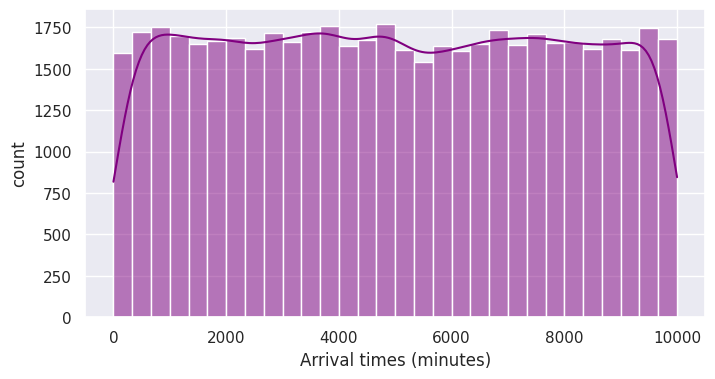

In [6]:
######################  TODO  ########################
# Distribution of Arrival Times

sns.set_theme()
plt.figure(figsize=(8, 4))
sns.histplot(arrival_times, bins = 30, color = 'purple', kde = True)
plt.xlabel("Arrival times (minutes)")
plt.ylabel("count")

plt.show()

######################  TODO  ########################

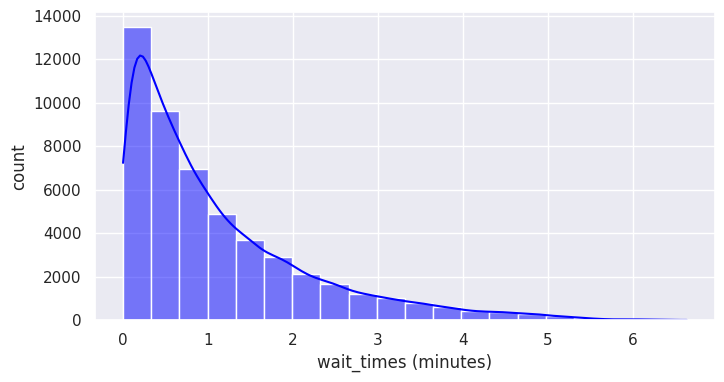

In [7]:
######################  TODO  ########################
# Distribution of Waiting Times
sns.set_theme()
plt.figure(figsize=(8, 4))
sns.histplot(wait_times, kde = True, color = 'blue', bins = 20)
plt.xlabel("wait_times (minutes)")
plt.ylabel("count")
plt.show()
######################  TODO  ########################

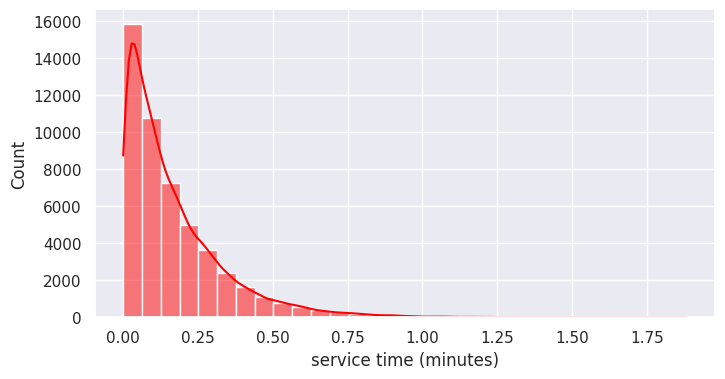

In [8]:
######################  TODO  ########################
# Distribution of Service Times

sns.set_theme()
plt.figure(figsize=(8, 4))
sns.histplot(service_times, bins = 30, color = 'red', kde = True)
plt.xlabel("service time (minutes)")

plt.show()

######################  TODO  ########################

A little explanatoin about KDE:  

KDE or so called Kernel Density Estimate is a method that as we can fit a smooth continues curve over our histogram and then obviously we'll have an estimation of PDF of the random variable

KDE has a boolean value set to either True or False, if KDE is set on False , there will bo no curve fit on our histrogram and if it is set on True then there will be a curve fit to the histogram which can be used as a good estimation of probablity density function of the random variable

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

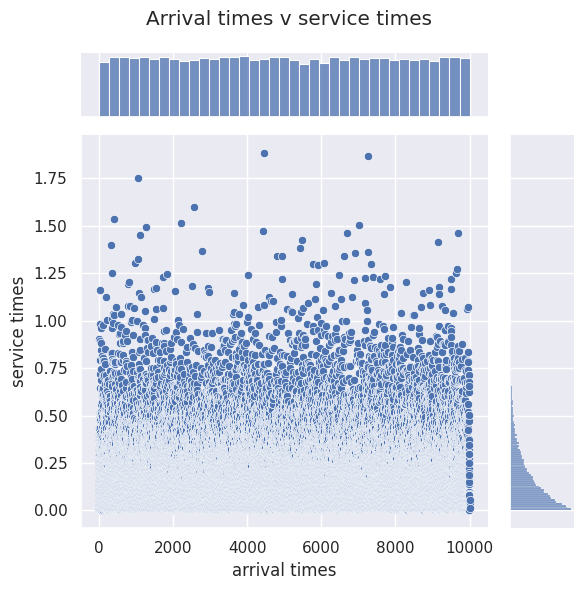

Covariance: -0.7926123522406181


In [9]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times


sns.set_theme()
sns.jointplot(x = arrival_times, y = service_times, kind = "scatter").set_axis_labels("arrival times", "service times")
plt.suptitle("Arrival times v service times ")

plt.tight_layout()
plt.show()
covariance_matrix = np.cov(arrival_times, service_times)
covariance = covariance_matrix[0, 1] 
print("Covariance:", covariance)
######################  TODO  ########################

the graph above is the joint distrubution of Arrival times and Service times shown in scatter method.  
as it can be seen since there is no relation or specific patter , there seems to be no correlation between Arrival_times and Service times and correlatio is near zero

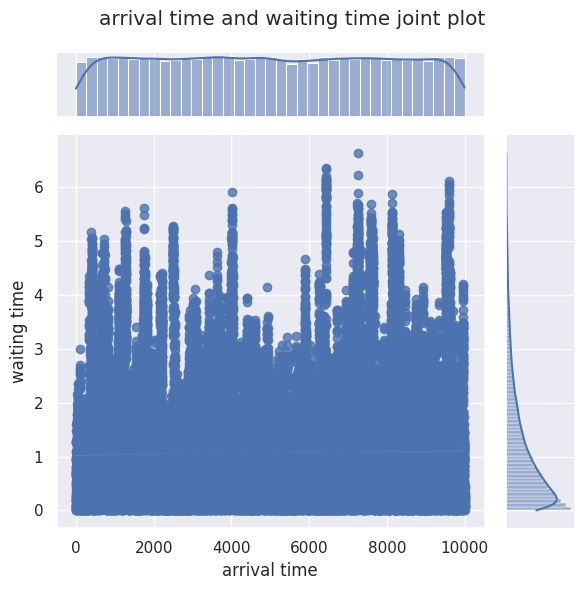

In [10]:
# Joint Distribution of Arrival and Wait Times

sns.jointplot(x = arrival_times, y = wait_times, kind = "reg")
plt.xlabel("arrival time")
plt.ylabel("waiting time")
plt.suptitle("arrival time and waiting time joint plot")

plt.tight_layout()
plt.show()


## Analysis of Joint Distributions

for the joint distribution of arrival time and service time, the joint plot is scattered in no pattern and all over the place so the conculusion is that covarince is close to zero but for the arrival time and waiting time joint plot one can indeed find that the two random variable have high negative covarince meaning if one (arrival times) get bigger , another one (waiting time) tendes to decrease .

## Scatter Plot and Correlation

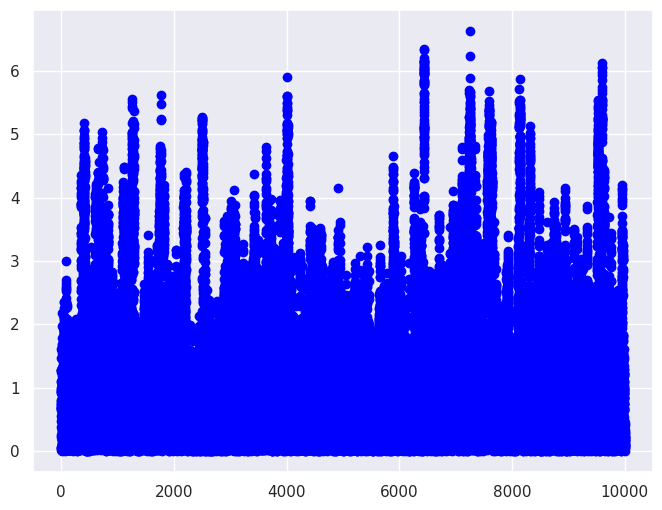

0.022211118079798694
Covariance: 68.79561287320877
2890.8997687183382
1.071413930240882
4989.96135262784


In [11]:
######################  TODO  ########################
# Scatter Plot of Arrival and Wait times

plt.figure(figsize=(8, 6))
plt.scatter(arrival_times, wait_times, color = 'blue')

plt.show()


#calculating correaltion
covariance_matrix = np.cov(arrival_times, wait_times)
covariance = covariance_matrix[0, 1]  # Extract the covariance value
corr = covariance / (np.std(arrival_times) * np.std(wait_times))
print(corr)
print("Covariance:", covariance)
print(np.sqrt(np.var(arrival_times)))
print(np.sqrt(np.var(wait_times)))
print(np.mean(arrival_times))

######################  TODO  ########################

## Calculating `total_times`

for the total time we have :  
total time = waiting time + service time

note that for finding the distribution of total_times array , it is visualized using sns.histplot

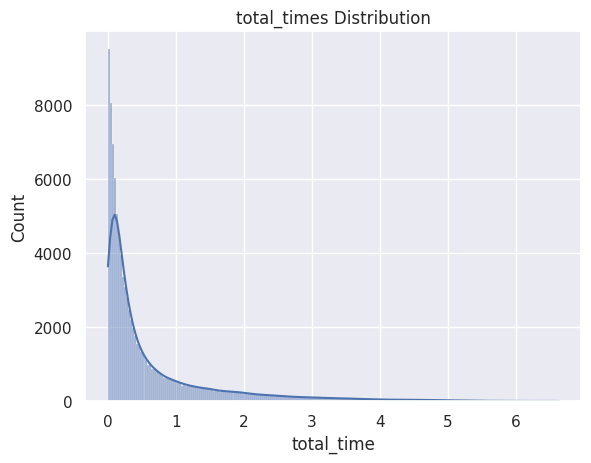

In [12]:
######################  TODO  ########################
# Distribution of Total Time Spent in the System

total_times = wait_times + service_times

sns.histplot(total_times, kde = "True")
plt.title("total_times Distribution")
plt.xlabel("total_time")
plt.show()
######################  TODO  ########################

the distribution of total time is an Exponential distribution and the reason is that total time is the sum of service time and wait time and both serivce and wait time have exponential distribution and we know that the sum of two indeipendent exponetial distribution is also expoenital 

## Conditional Wait Times

From conditional distribution we know:  
$$
f_{X \mid Y}(x \mid y) = \frac{f_{X, Y}(x, y)}{f_Y(y)}
$$  



The idea that is used for the distribution of total and wait timing with condition of arrive_time less than 50 is to filter arrival_times array and then use the valid filtered indices for wait_times and total_times

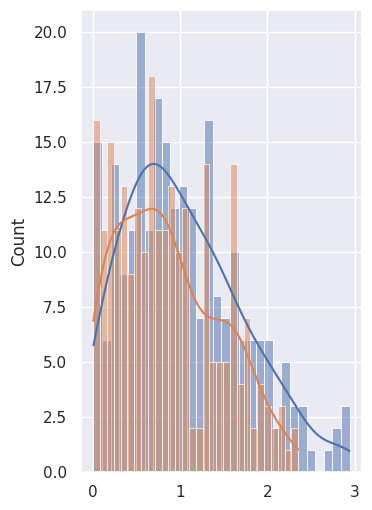

In [13]:
######################  TODO  ########################
# Conditional Distribution of Waiting Times (Arrival Time < 50)

arrival_times = np.array(arrival_times)
wait_times = np.array(wait_times)
total_times = np.array(total_times)
service_times = np.array(service_times)


filtered_indices = arrival_times < 50
filtered_arrival_times = arrival_times[filtered_indices]
filtered_wait_times = wait_times[filtered_indices]
filtered_service_times = service_times[filtered_indices]


total_times = filtered_wait_times + filtered_service_times

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(total_times, kde = True, bins = 30)
plt.subplot(1, 2, 1)
sns.histplot(filtered_wait_times, kde = True, bins = 30)

plt.show()


######################  TODO  ########################